# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [4]:
# Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [5]:
#index_col=0 to avoid having an index

age_abs = pd.read_csv("../data/absences.csv",index_col=0)

In [24]:
age_abs.head()

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9


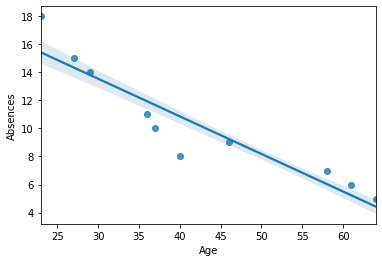

In [26]:
#ci = size of the confidence interval

scatter_age_abs = sns.regplot(x=age_abs["Age"], 
                  y=age_abs["Absences"], 
                  data=age_abs,ci=60)

In [29]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age_abs["Age"], age_abs["Absences"])

print ('The r_value is: ' + str(r_value))


The r_value is: -0.9325434092481011


In [ ]:
#conclusions
''' 
Looking at the scatter plot and the linear regression computed, there seems to be a strong negative correlation
between age and absences. When age increases, absences decrease. When we look at the r-value we can see that
the value is negative (negative corelation) and that is close to 1, indicating that the numerical values are
highly related
'''

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [32]:
def slope_intercept (x,y):
    
    #first we calculate the mean of each variable
    xmean = sum(x)/len(x)  
    ymean = sum(y)/len(y)

    # we use the formula to calculate the slope (without suming the modified values) and create a list
    # x: value from variable 1
    # y: value from variable 2
    slope_list_1 = sum([(x-xmean)*(y-ymean) for x,y in zip(x,y)])
    slope_list_2 = sum([((x-xmean)**2) for x in x])


    # we sum the list's values to obtain the slope
    slope = slope_list_1 / slope_list_2

    # we apply the formula to obtain the intercept
    intercept= ymean-slope*xmean
    
    return(slope,intercept)

In [37]:
# Let's have a look at the results for age and absences

slope,intercept = slope_intercept(age_abs["Age"],age_abs["Absences"])
print("slope:",slope,"\nintercept",intercept)


slope: -0.2681088337033404 
intercept 21.58738189891063


In [34]:
# Let's make sure we calculated it properly

slope, intercept, r_value, p_value, std_err = stats.linregress(age_abs["Age"], age_abs["Absences"])
print ("slope:",slope)
print ("intercept:",intercept)

slope: -0.2681088337033403
intercept: 21.58738189891063


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [85]:
slope,intercept = slope_intercept(age_abs["Age"],age_abs["Absences"])

In [86]:
# negative, so the slope will be decreaseing (line will go down)

slope

-0.2681088337033404

In [87]:
intercept

21.58738189891063

In [88]:
# let's manually create the linear regression. The regression follows the following formula:

# y = mx + a
#   m-->slope
#   a-->intercept

predicted_y = intercept + slope * age_abs["Age"]
predicted_y

# we created the predicted y values (with the intercept and slope calculated with the observed x)  
# that we will plot with the observed x

0    14.348443
1     5.232743
2    11.667355
3    15.420879
4     9.254376
5     6.037070
6    13.812226
7    11.935464
8     4.428417
9    10.863029
Name: Age, dtype: float64

In [72]:
# function to calculate the predicted y

def linear_regr_y (x,y):
    slope,intercept = slope_intercept(x,y)
    predicted_y = intercept + slope * x
    return predicted_y

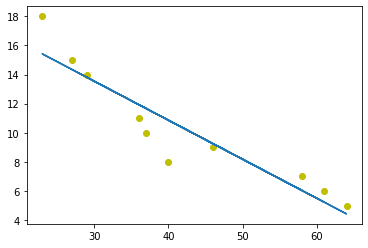

In [139]:
# in order to plot the regression line we plot it together with the scatter plot

plt.scatter(age_abs["Age"],age_abs["Absences"],color="y")
plt.plot(age_abs["Age"],predicted_y)
plt.show()

In [ ]:
# The resulting plot is very similar if not the same as the one Seaborn plotted

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [17]:
'''
covariance is a measure of the joint variability of two random variables

  if cov(x,y) ~ 0 --> data circularly accumulated
  if cov(x,y) < 0 --> data ovally shaped to the left (the two variables tend to move in inverse directions)
  if cov(x,y) > 0 --> data ovally shaped to the right (the two variables tend to move in the same direction) 

the covariance formula for a sample is Cov(x,y) = Σ ((x1 – meanx) * (y1 – meany)) / (N – 1)
'''

def covariance(x,y):
    
    xmean = sum(x)/len(x)   # so we do not have to import numpy fo the function
    ymean = sum(y)/len(y)
    
    cov_num = sum([(x1 - xmean)*(y1-ymean) for x1,y1 in zip(x,y)]) # numerator formula
    cov_den = len(age_abs)-1   #denominator formula

    covariance = cov_num / cov_den
    
    return covariance

In [18]:
covariance (age_abs["Age"],age_abs["Absences"])

# it indicates that the variables tend to move in inverse directions

-57.699999999999996

In [19]:
#let's see if the covariance formula was done properly (yes it was)
age_abs.cov()

,EmployeeID,Age,Absences
EmployeeID,9.166667,9.055556,-4.388889
Age,9.055556,215.211111,-57.700000
Absences,-4.388889,-57.700000,17.788889


In [11]:
'''
The correlation coefficient is a statistical measure of the strength of the relationship
between the relative movements of two variables.

ρxy = Σ ((x1 – meanx) * (y1 – meany))/σx*σy

  ρxy = Pearson product-moment correlation coefficient
  σx = standard deviation of x
  σy = standard deviation of y
'''

# age an absences have the same range. The initial aproach: 
# [((sum((x1 - mean1)**2))**(1/2)) * ((sum((y1 - mean2)**2))**(1/2)) for x1,y1 in zip(x,y)]
# did not work so let's try smth else with the index


def correlation (x,y):

    xmean = sum(x)/len(x)   # so we do not have to import numpy fo the function
    ymean = sum(y)/len(y)

    num = sum([(x1 - xmean)*(y1 - ymean) for x1,y1 in zip(x,y)])  # numerator formula

    den_stdx = sum([((x1 - xmean)**2) for x1 in x])        # denominator part 1 std of x
    den_stdy = sum([((y1 - ymean)**2) for y1 in y])        # denominator part 2 std of y

    corr = num/(den_stdx*den_stdy)**(1/2)     # assembled correlation formula
    
    return corr

In [12]:
correlation(age_abs["Age"],age_abs["Absences"])

-0.9325434092481012

In [116]:
#let's make sure the calculation was done properly (and yes it is!)
age_abs.corr()

,EmployeeID,Age,Absences
EmployeeID,1.000000,0.203881,-0.343696
Age,0.203881,1.000000,-0.932543
Absences,-0.343696,-0.932543,1.000000


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [21]:
print(covariance (age_abs["Age"],age_abs["Absences"]))

print(correlation(age_abs["Age"],age_abs["Absences"]))

-57.699999999999996
-0.9325434092481012


In [ ]:
''' 
Negative covariance is indicating that the two variables are moving or tend to move in different directions

The correlation coefficient is indicating that the strength of the relationship between the two variables
is high and the sign of the coefficient is telling is that they are inversely related
'''

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
'''
After analysing the data, it can be seen (considering the correlation coeficient and having a look at the
linear regression plot) that there seems to be a conection between age and absenteeism. 
Further statistical analysis should be done to prove its significance.
'''

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [22]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [23]:
covariance (ironbeers_df["X"],ironbeers_df["Y"])

9.333333333333334

In [24]:
correlation (ironbeers_df["X"],ironbeers_df["Y"])

0.9770084209183943

In [ ]:
'''looking at the covariance and correlation sign we can tell that the two variables tend to move in the same
direction, when one increases, so does the other one.
The correlation coeficcient number tells us that the correlation is very strong since it is almost 1'''

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

In [40]:
slope,intercept = slope_intercept(ironbeers_df["X"],ironbeers_df["Y"])

In [45]:
newy = linear_regr_y(ironbeers_df["X"],ironbeers_df["Y"])

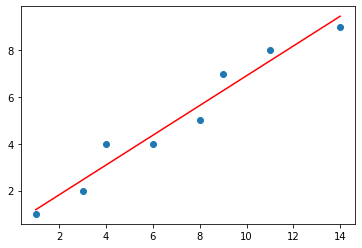

In [48]:
plt.scatter(ironbeers_df["X"],ironbeers_df["Y"])
plt.plot(ironbeers_df["X"],newy, color="r")
plt.show()

In [ ]:
'''the scatter plot and the linear regression indicate (same as correlation coefiicient and covariance)
that the relationship seems to be very strong and that both variables follow and increasing trend'''

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

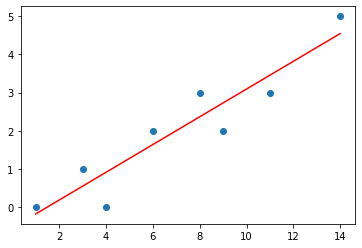

In [74]:
# Let's see the relationship between the ones told and the ones that DO NOT stay

ynew = linear_regr_y(ironbeers_df["X"],(ironbeers_df["X"]-ironbeers_df["Y"]))
plt.scatter(ironbeers_df["X"],(ironbeers_df["X"]-ironbeers_df["Y"]))
plt.plot(ironbeers_df["X"],ynew, color="r")
plt.show()

In [68]:
# % of the ones that stay
index = ironbeers_df["Y"]/ironbeers_df["X"]*100

<BarContainer object of 8 artists>

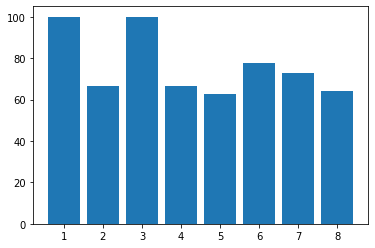

In [75]:
plt.bar([1,2,3,4,5,6,7,8],index)

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [78]:
np.mean(index)

76.32801226551226

In [85]:
np.std(index)

14.399250038093747

In [87]:
stats.t.interval(.95, len(index)-1, np.mean(index), stats.sem(index) )

(63.458769531304945, 89.19725499971958)

In [ ]:
'''
The results obtained indicated that the more people I tell, the more people that stays,
but also the more people that do not stay. 
Nonetheless, if we have a look at the % of people that do stays we can see that everyday is more than the 50%
which could makes us think that it is not really our fault and that telling more people does not mean that
less will stay. In fact, it seems that on average, the people that stays proportionetly to the people told falls
within the 60-80 % range
'''

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here